### Introduction
Cybersecurity is a critical area in today's digital world, with phishing attacks being a common threat. 
Phishing attacks often involve fraudulent attempts to obtain sensitive information such as usernames, passwords, 
and credit card details by masquerading as a trustworthy entity in electronic communication. 
In this assignment, I aimed to apply machine learning techniques to detect phishing URLs, which can help 
in preventing potential cyber threats.

### Dataset
I will be using the Phishing Dataset for Machine Learning sourced from Kaggle (https://www.kaggle.com/datasets/shashwatwork/phishing-dataset-for-machine-learning). This dataset contains various 
features extracted from URLs, such as the number of dots in the URL, presence of certain symbols, 
length of the URL, etc. The target variable is a binary classification indicating whether a URL is 
legitimate (0) or phishing (1).

### Summary

##### Decision Tree
Accuracy: 95%  
Cross-validation Mean Accuracy: 95.43%  
Confusion Matrix:  
True Positives (TP): 1971  
True Negatives (TN): 1848  
False Positives (FP): 94  
False Negatives (FN): 87  
Precision: 95% (for both classes)  
Recall: 95% (for both classes)  
F1-score: 95% (for both classes)  
###### Summary: The Decision Tree model achieved an accuracy of 95% with consistent performance across precision, recall, and F1-score for both phishing and legitimate classes.

##### Random Forest
Accuracy: 98%  
Cross-validation Mean Accuracy: 98.09%  
Confusion Matrix:  
True Positives (TP): 994  
True Negatives (TN): 970  
False Positives (FP): 18  
False Negatives (FN): 18  
Precision: 98% (for both classes)  
Recall: 98% (for both classes)  
F1-score: 98% (for both classes)  
###### Summary: The Random Forest model achieved the highest accuracy of 98% with excellent precision, recall, and F1-score for both classes, indicating robust performance.

##### Logistic Regression
Accuracy: 94%  
Cross-validation Mean Accuracy: 94.65%  
Confusion Matrix:  
True Positives (TP): 959  
True Negatives (TN): 918  
False Positives (FP): 70  
False Negatives (FN): 53  
Precision: 95% (for phishing), 93% (for legitimate)  
Recall: 93% (for phishing), 95% (for legitimate)  
F1-score: 94% (for both classes)  
###### Summary: The Logistic Regression model achieved an accuracy of 94% with slightly lower precision, recall, and F1-score compared to Decision Tree and Random Forest models.

#### Overall Summary:
Random Forest outperformed the other models with the highest accuracy of 98%.  
Decision Tree demonstrated consistent performance with an accuracy of 95%.  
Logistic Regression showed slightly lower accuracy at 94% but still provided decent performance.

# Decision Tree

In [272]:
#import libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [273]:
# load dataset
phishing = pd.read_csv('Phishing_Legitimate_full.csv')


<Axes: >

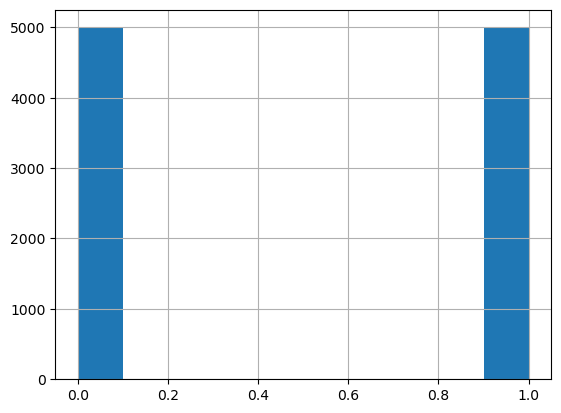

In [274]:
phishing['CLASS_LABEL'].hist()

In [275]:
# Building decisiono tree model 
# define attributes and target variable
features = ['NumDots', 'SubdomainLevel', 'PathLevel', 'UrlLength', 'NumDash', 'NumDashInHostname', 'AtSymbol', 
            'TildeSymbol', 'NumUnderscore', 'NumPercent', 'NumQueryComponents', 'NumAmpersand', 'NumHash', 
            'NumNumericChars', 'NoHttps', 'RandomString', 'IpAddress', 'DomainInSubdomains', 'DomainInPaths', 
            'HttpsInHostname', 'HostnameLength', 'PathLength', 'QueryLength', 'DoubleSlashInPath', 
            'NumSensitiveWords', 'EmbeddedBrandName', 'PctExtHyperlinks', 'PctExtResourceUrls', 'ExtFavicon', 
            'InsecureForms', 'RelativeFormAction', 'ExtFormAction', 'AbnormalFormAction', 
            'PctNullSelfRedirectHyperlinks', 'FrequentDomainNameMismatch', 'FakeLinkInStatusBar', 
            'RightClickDisabled', 'PopUpWindow', 'SubmitInfoToEmail', 'IframeOrFrame', 'MissingTitle', 
            'ImagesOnlyInForm', 'SubdomainLevelRT', 'UrlLengthRT', 'PctExtResourceUrlsRT', 
            'AbnormalExtFormActionR', 'ExtMetaScriptLinkRT', 'PctExtNullSelfRedirectHyperlinksRT']
target = ['CLASS_LABEL']
phishing_X = phishing[features]
phishing_y = phishing[target]

In [276]:
phishing_y.describe()

CLASS_LABEL
count  10000.000000
mean       0.500000
std        0.500025
min        0.000000
25%        0.000000
50%        0.500000
75%        1.000000
max        1.000000

In [277]:
# split train data into train and test, 60% in training and 40% in testing
X_train, X_test, y_train, y_test = train_test_split(phishing_X, phishing_y, test_size=0.4, random_state = 42)

In [278]:
# define our model decision tree model
phishing_model = DecisionTreeClassifier(max_depth=4)

In [279]:
# Perform 5-fold cross-validation
cv_scores = cross_val_score(phishing_model, X_train, y_train, cv=5)

In [280]:
# Fit the model on the entire training data
phishing_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4)

In [281]:
# Making predictions on the test set
pred_test = phishing_model.predict(X_test)

In [282]:
# Calculate and print the accuracy
accuracy = accuracy_score(y_test, pred_test)
print(f"Accuracy: {accuracy:.4f}")

Accuracy: 0.9543


In [283]:
# Print cross-validation scores
print("Cross-validation scores:", cv_scores)
print("Mean CV Accuracy:", cv_scores.mean())

Cross-validation scores: [0.95583333 0.95       0.95333333 0.9575     0.95583333]
Mean CV Accuracy: 0.9545


In [284]:
# Print the confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, pred_test))


Confusion Matrix:
[[1848   94]
 [  89 1969]]


In [285]:
# Print the classification report
print("\nClassification Report:")
print(classification_report(y_test, pred_test))


Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.95      0.95      1942
           1       0.95      0.96      0.96      2058

    accuracy                           0.95      4000
   macro avg       0.95      0.95      0.95      4000
weighted avg       0.95      0.95      0.95      4000



# Random Forest

In [286]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import pandas as pd

In [287]:
# load dataset
phishing = pd.read_csv('Phishing_Legitimate_full.csv')

In [288]:
X = phishing.drop(['id', 'CLASS_LABEL'], axis=1)  
y = phishing['CLASS_LABEL']

In [289]:
# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [290]:
# Initialize the Random Forest model
random_forest_model = RandomForestClassifier(n_estimators=100, random_state=42)

In [291]:
# Perform 5-fold cross-validation
cv_scores = cross_val_score(random_forest_model, X_train, y_train, cv=5)

In [292]:
# Fit the model on the entire training data
random_forest_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [293]:
# Making predictions on the test set
predictions = random_forest_model.predict(X_test)

In [294]:
# Calculate and print the accuracy
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy:.4f}")

Accuracy: 0.9820


In [295]:
# Print cross-validation scores
print("Cross-validation scores:", cv_scores)
print("Mean CV Accuracy:", cv_scores.mean())

Cross-validation scores: [0.984375 0.97625  0.98125  0.979375 0.983125]
Mean CV Accuracy: 0.9808749999999999


In [296]:

# Print the confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, predictions))


Confusion Matrix:
[[970  18]
 [ 18 994]]


In [271]:
# Print the classification report
print("\nClassification Report:")
print(classification_report(y_test, predictions))


Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       988
           1       0.98      0.98      0.98      1012

    accuracy                           0.98      2000
   macro avg       0.98      0.98      0.98      2000
weighted avg       0.98      0.98      0.98      2000



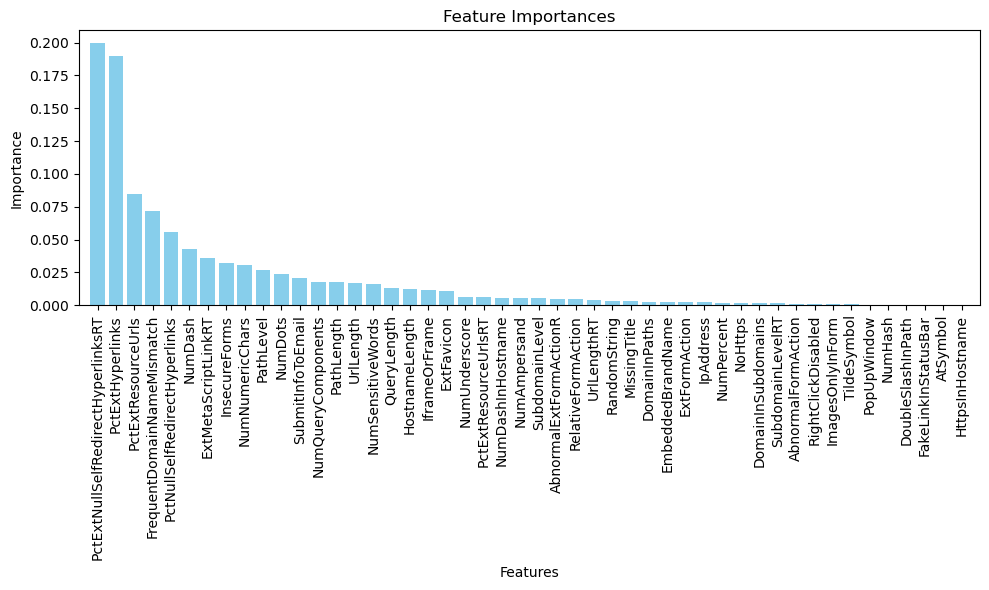

In [315]:
import matplotlib.pyplot as plt

# Get feature importances from the model
importances = random_forest_model.feature_importances_

# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

# Plot
plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.bar(range(X.shape[1]), importances[indices], color="skyblue", align="center")
plt.xticks(range(X.shape[1]), X.columns[indices], rotation=90)
plt.xlim([-1, X.shape[1]])
plt.xlabel("Features")
plt.ylabel("Importance")
plt.tight_layout()
plt.show()

# Logistic Regression

In [297]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
import pandas as pd

In [298]:
# load dataset
phishing = pd.read_csv('Phishing_Legitimate_full.csv')

In [299]:
X = phishing.drop(['id', 'CLASS_LABEL'], axis=1)  
y = phishing['CLASS_LABEL']

In [300]:
# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [301]:
# Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [302]:
# Training the Logistic Regression model with cross-validation
model = LogisticRegression(max_iter=1000)  

In [303]:
# Perform 5-fold cross-validation
cv_scores = cross_val_score(model, X_train, y_train, cv=5)

In [304]:
# Fit the model on the entire training data
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [305]:
# Making predictions on the test set
y_pred = model.predict(X_test)

In [306]:
# Calculating and printing the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

Accuracy: 0.9385


In [307]:
# Printing cross-validation scores
print("Cross-validation scores:", cv_scores)
print("Mean CV Accuracy:", cv_scores.mean())

Cross-validation scores: [0.946875 0.94625  0.95     0.9525   0.936875]
Mean CV Accuracy: 0.9465


In [308]:
# Printing the confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Confusion Matrix:
[[918  70]
 [ 53 959]]


In [248]:
# Printing the classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.93      0.94       988
           1       0.93      0.95      0.94      1012

    accuracy                           0.94      2000
   macro avg       0.94      0.94      0.94      2000
weighted avg       0.94      0.94      0.94      2000



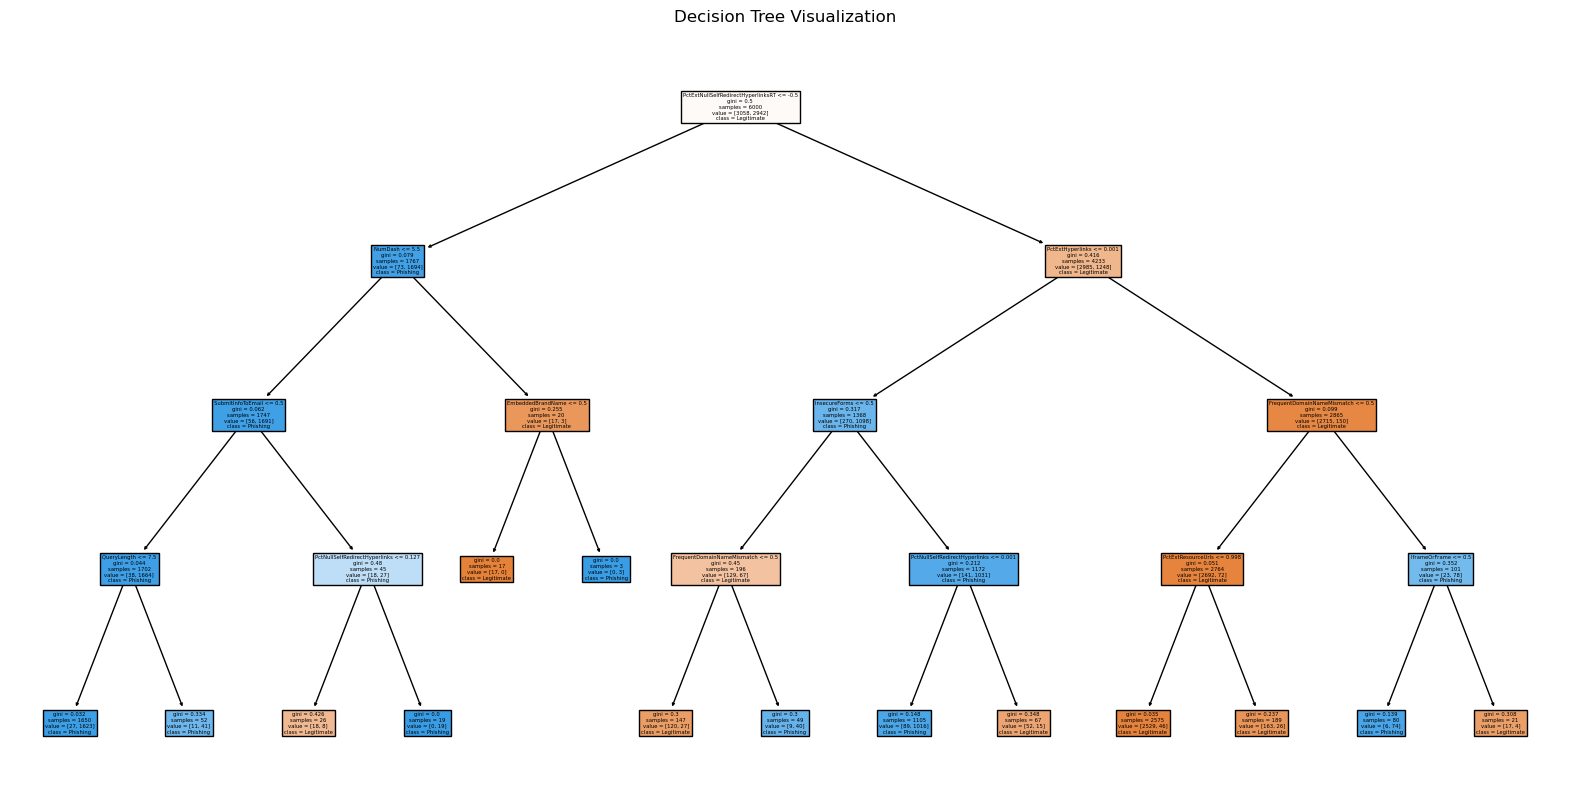

In [311]:
# Visualize decision tree
from sklearn.tree import plot_tree
plt.figure(figsize=(20, 10))
plot_tree(phishing_model, filled=True, feature_names=features, class_names=['Legitimate', 'Phishing'])
plt.title('Decision Tree Visualization')
plt.show()